In [1]:
#https://www.esrl.noaa.gov/psd/enso/mei/
#https://www.esrl.noaa.gov/psd/enso/mei.ext/table.ext.html



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests

In [3]:
columnStr = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']

df = pd.read_csv('/home/poyraden/MLR_Uccle/Codes/Files/teleconnection_indices/enso_LOTUS.txt',
                   sep = "\s *", engine="python", skiprows=1, names=columnStr)
df[-10:], len(df)
#df.loc[1979], df.loc[1979][1]

(        DJ    JF    FM    MA    AM      MJ      JJ      JA      AS      SO  \
 2010  0.93  1.28  1.31  0.49 -0.17   -1.33   -2.43   -2.40   -2.28   -2.18   
 2011 -1.83 -1.63 -1.79 -1.74 -1.29   -1.08   -0.86   -0.88   -1.16   -1.37   
 2012 -1.08 -0.67 -0.59 -0.43 -0.35   -0.28    0.30   -0.06   -0.32   -0.22   
 2013 -0.05 -0.07 -0.14 -0.37 -0.71   -1.18   -0.85   -0.50   -0.38   -0.16   
 2014 -0.51 -0.43 -0.08 -0.16 -0.18   -0.01    0.32    0.16   -0.15    0.07   
 2015  0.23  0.05  0.13  0.35  0.96    1.85    1.73    1.92    2.21    2.11   
 2016  1.94  1.81  1.31  1.33  1.26    0.36   -0.51   -0.28   -0.34   -0.60   
 2017 -0.41 -0.41 -0.58 -0.21  0.17   -0.29   -0.70   -0.77   -0.80   -0.63   
 2018 -0.77 -0.70 -0.79 -1.29 -0.91   -0.51   -0.17    0.36    0.52    0.41   
 2019  0.08  0.52  0.77  0.33  0.26 -999.00 -999.00 -999.00 -999.00 -999.00   
 
           ON      ND  
 2010   -2.04   -1.91  
 2011   -1.21   -1.24  
 2012   -0.07   -0.07  
 2013   -0.18   -0.35  
 2014    

In [4]:
year = df.index.tolist()
print(year)
tot = len(year)
date = [[0] * 12] * tot
index = [[''] * 12] * tot



[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [5]:
indv = []
datev = []

for y in range(tot):
    for m in range(12):
        date[y][m] = df.loc[year[y]][m]
        index[y][m] = str(year[y])+'-'+str(m+1)+'-01'
        if(y < 3):print(y,m,year[y], date[y][m], index[y][m])
        indv.append(index[y][m])
        datev.append(date[y][m])
            
        #print(year[y], df.loc[year[y]][m])
print(len(datev),datev)
print(len(indv), indv)

0 0 1979 0.47 1979-1-01
0 1 1979 0.26 1979-2-01
0 2 1979 -0.08 1979-3-01
0 3 1979 0.2 1979-4-01
0 4 1979 0.27 1979-5-01
0 5 1979 -0.15 1979-6-01
0 6 1979 -0.14 1979-7-01
0 7 1979 0.44 1979-8-01
0 8 1979 0.38 1979-9-01
0 9 1979 0.24 1979-10-01
0 10 1979 0.52 1979-11-01
0 11 1979 0.65 1979-12-01
1 0 1980 0.35 1980-1-01
1 1 1980 0.19 1980-2-01
1 2 1980 0.41 1980-3-01
1 3 1980 0.59 1980-4-01
1 4 1980 0.55 1980-5-01
1 5 1980 0.62 1980-6-01
1 6 1980 0.62 1980-7-01
1 7 1980 0.15 1980-8-01
1 8 1980 0.2 1980-9-01
1 9 1980 0.09 1980-10-01
1 10 1980 -0.03 1980-11-01
1 11 1980 -0.06 1980-12-01
2 0 1981 -0.33 1981-1-01
2 1 1981 -0.24 1981-2-01
2 2 1981 0.33 1981-3-01
2 3 1981 0.41 1981-4-01
2 4 1981 -0.27 1981-5-01
2 5 1981 -0.6 1981-6-01
2 6 1981 -0.51 1981-7-01
2 7 1981 -0.31 1981-8-01
2 8 1981 -0.01 1981-9-01
2 9 1981 -0.1 1981-10-01
2 10 1981 -0.22 1981-11-01
2 11 1981 -0.16 1981-12-01
492 [0.46999999999999997, 0.26000000000000001, -0.080000000000000002, 0.20000000000000001, 0.27000000000000002

In [12]:
df_ds = pd.DataFrame( columns = ['ind','enso_meiv2'])
#df_ds = pd.DataFrame( 'enso_ds': datev)

df_ds['ind'] = indv
df_ds['ind'] = pd.to_datetime(df_ds['ind'], format='%Y-%m')
df_ds['enso_meiv2'] = datev
df_ds.set_index('ind', inplace=True)
df_ds[0:20]

,enso_meiv2
ind,
1979-01-01,0.47
1979-02-01,0.26
1979-03-01,-0.08
1979-04-01,0.20
1979-05-01,0.27
1979-06-01,-0.15
1979-07-01,-0.14
1979-08-01,0.44
1979-09-01,0.38


In [13]:
df_ds.to_csv('/home/poyraden/MLR_Uccle/Files/enso_meiv2.csv')

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


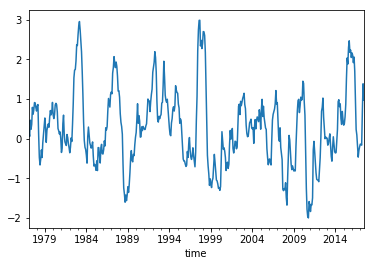

In [14]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))
predictors.enso.plot()

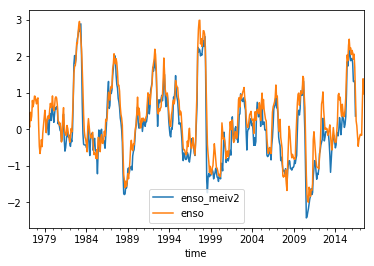

In [16]:
df_ds[df_ds['enso_meiv2'] > -99].loc['1977-02-01':'2016-06-01'].plot()
predictors.enso.plot(legend = 'enso')
plt.savefig('ENSO_mei2.pdf')